## **Benchmarking (Práctica)**

Para consolidar los conceptos aprendidos, realizaremos un ejercicio completo utilizando el RandomForestRegressor junto con otros modelos de regresión.

**Instrucciones:**
 
**1. Carga y Exploración de Datos:**

Cargar el dataset Boston Housing y revisar su estructura básica.

c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\sklearn\datasets\_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


Primeras filas del dataset:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     5

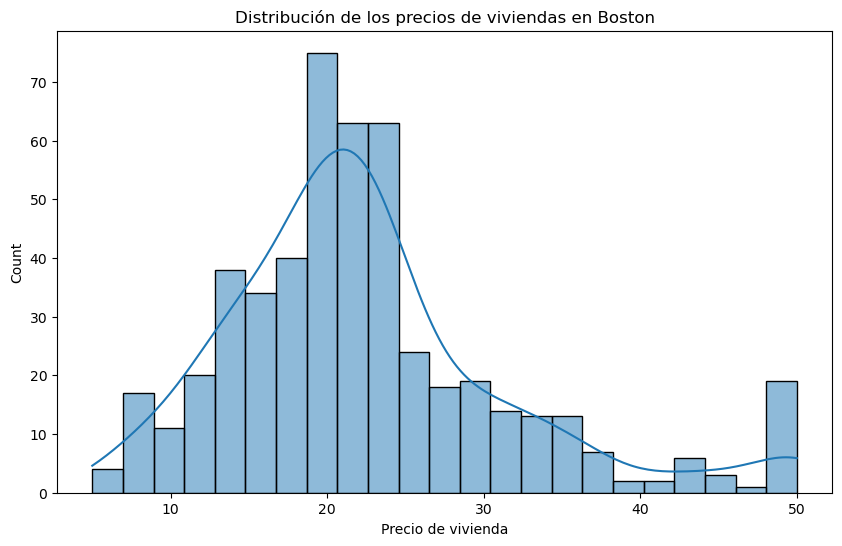

In [7]:
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset Boston Housing desde OpenML
boston_data = fetch_openml(name='boston', as_frame=True)
# Convertir a DataFrame
df = boston_data.frame

# Revisar la estructura básica del dataset
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nDescripción estadística del dataset:")
print(df.describe())

# Visualización básica para ver la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True)  # MEDV es la columna de precios en este dataset
plt.xlabel('Precio de vivienda')
plt.title('Distribución de los precios de viviendas en Boston')
plt.show()


**Describir las variables y su distribución.**

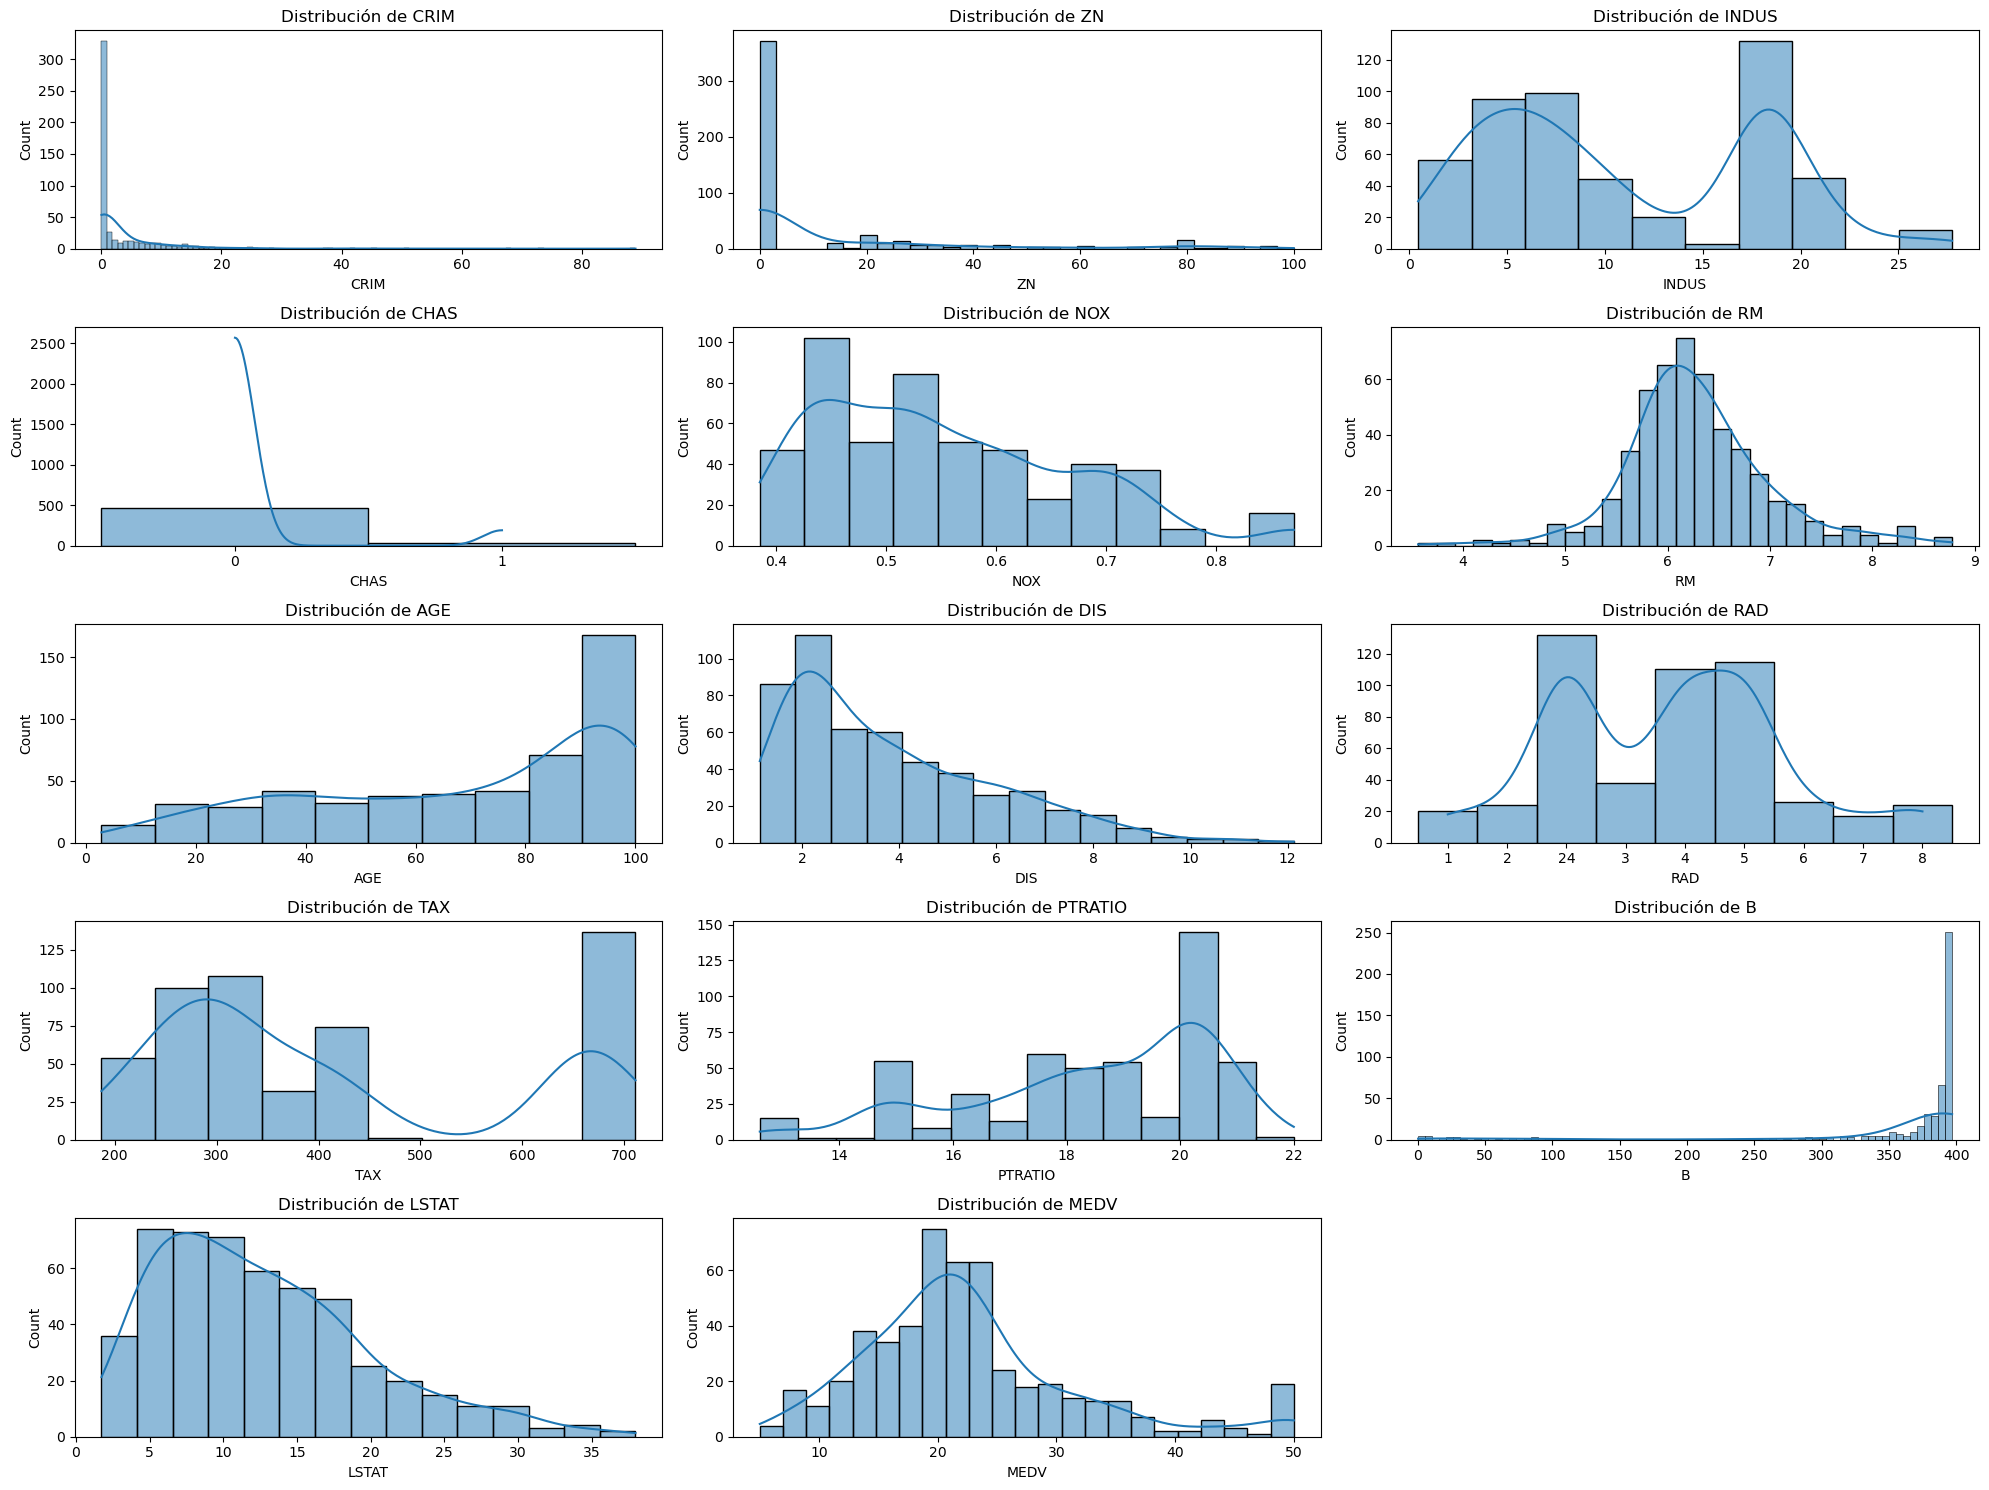

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración para visualización de varias variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()


c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\sklearn\datasets\_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


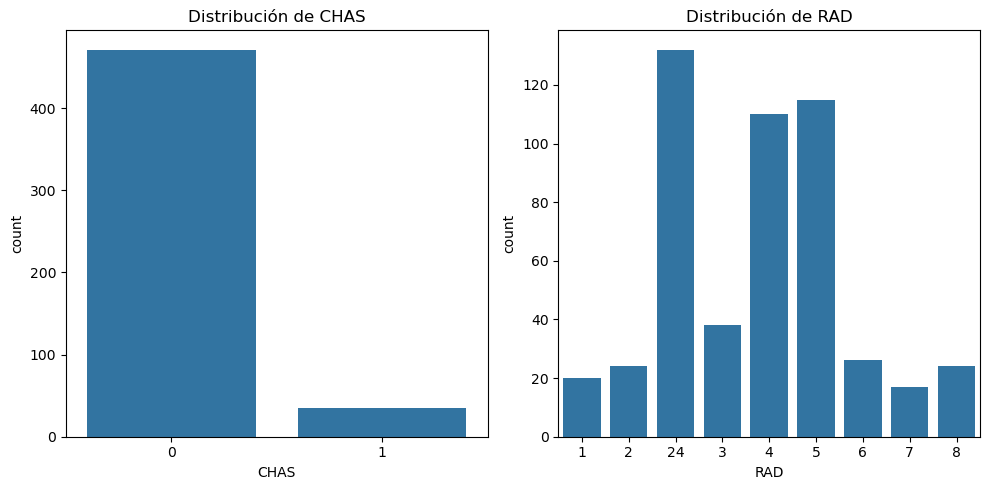

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Cargar el dataset Boston Housing desde OpenML
boston_data = fetch_openml(name='boston', as_frame=True)
boston_df = boston_data.frame

# Convertir columnas categóricas en tipo 'category' para mantener consistencia con la descripción dada
boston_df['CHAS'] = boston_df['CHAS'].astype('category')
boston_df['RAD'] = boston_df['RAD'].astype('category')

# Visualización de histogramas para variables numéricas
numeric_columns = boston_df.select_dtypes(include=['float64']).columns
 # Visualización de gráficos de barras para variables categóricas
categorical_columns = boston_df.select_dtypes(include=['category']).columns

plt.figure(figsize=(10, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=boston_df, x=column)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()




In [9]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
print("Primeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [12]:

print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None


**Detectar y tratar valores nulos.**

In [14]:
# Mostrar la cantidad de valores nulos en cada columna
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [15]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [22]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
CRIM,506,0,0.0
ZN,506,0,0.0
INDUS,506,0,0.0
CHAS,506,0,0.0
NOX,506,0,0.0
RM,506,0,0.0
AGE,506,0,0.0
DIS,506,0,0.0
RAD,506,0,0.0
TAX,506,0,0.0


**Analizar la correlación entre variables.**

Outliers en la columna CRIM: 66 valores
Outliers en la columna ZN: 68 valores
Outliers en la columna INDUS: 0 valores
Outliers en la columna NOX: 0 valores
Outliers en la columna RM: 30 valores
Outliers en la columna AGE: 0 valores
Outliers en la columna DIS: 5 valores
Outliers en la columna TAX: 0 valores
Outliers en la columna PTRATIO: 15 valores
Outliers en la columna B: 77 valores
Outliers en la columna LSTAT: 7 valores
Outliers en la columna MEDV: 40 valores


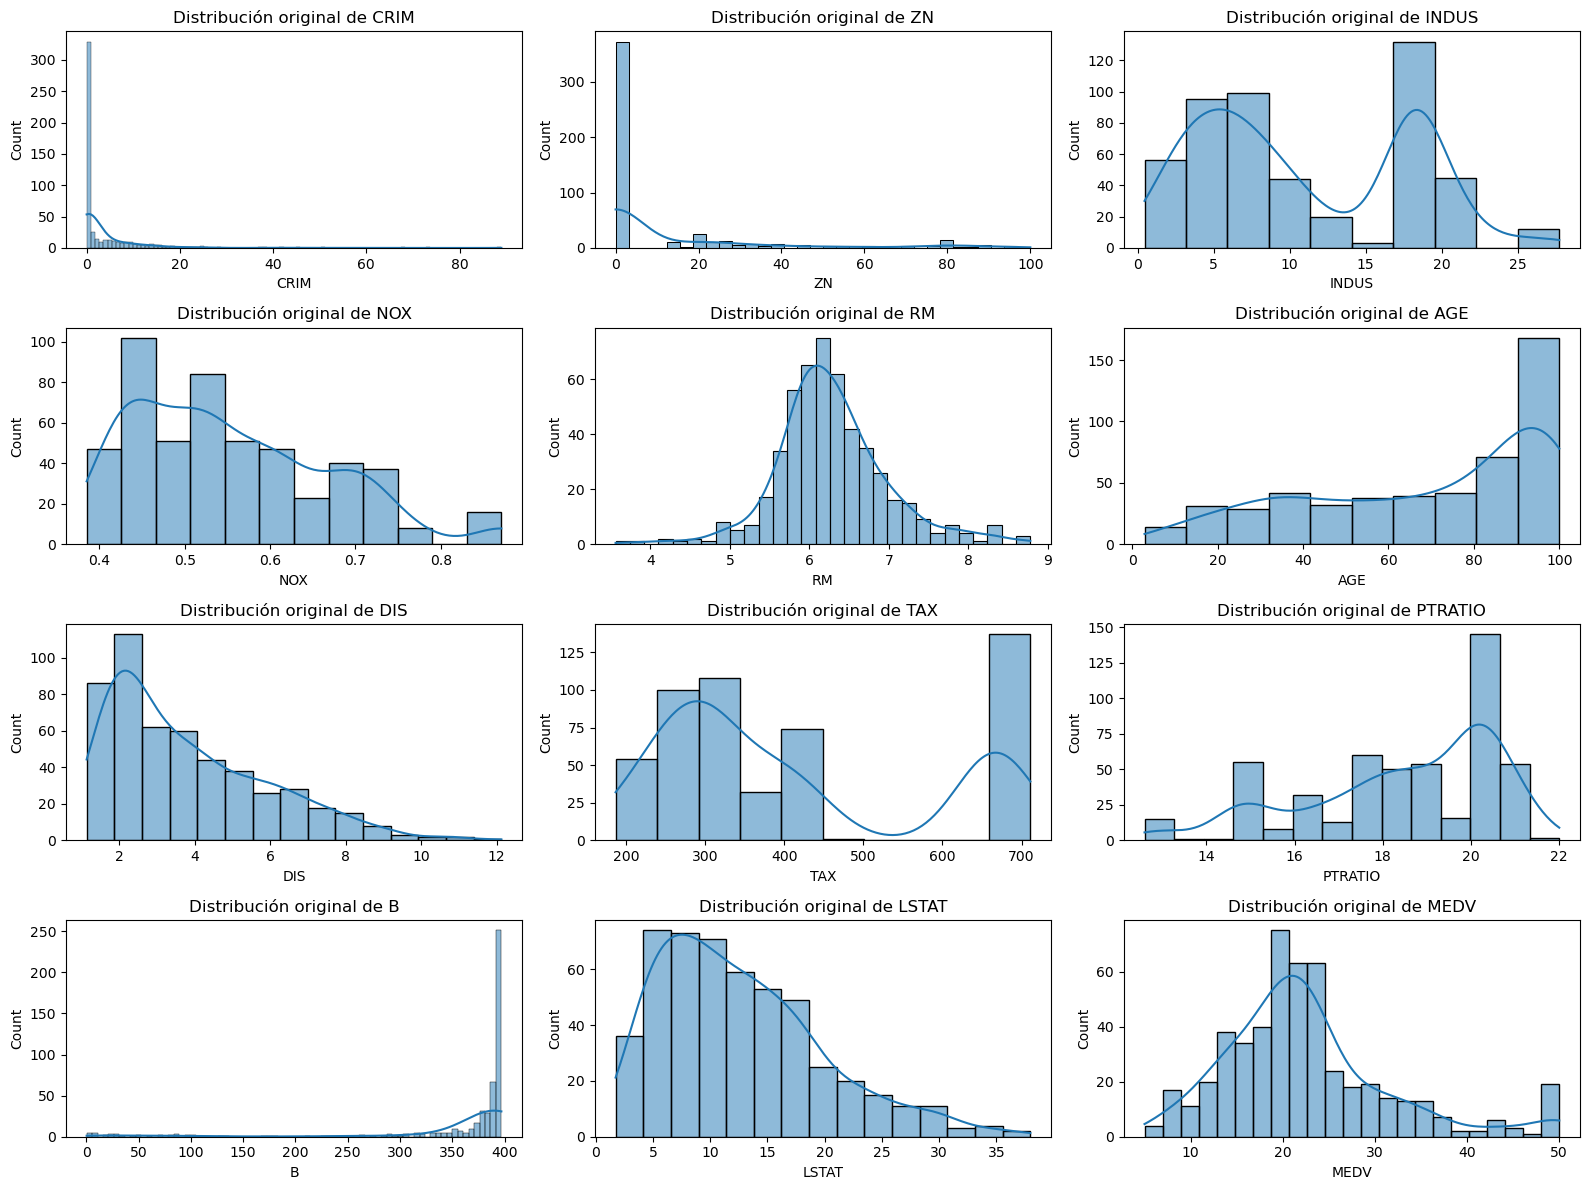

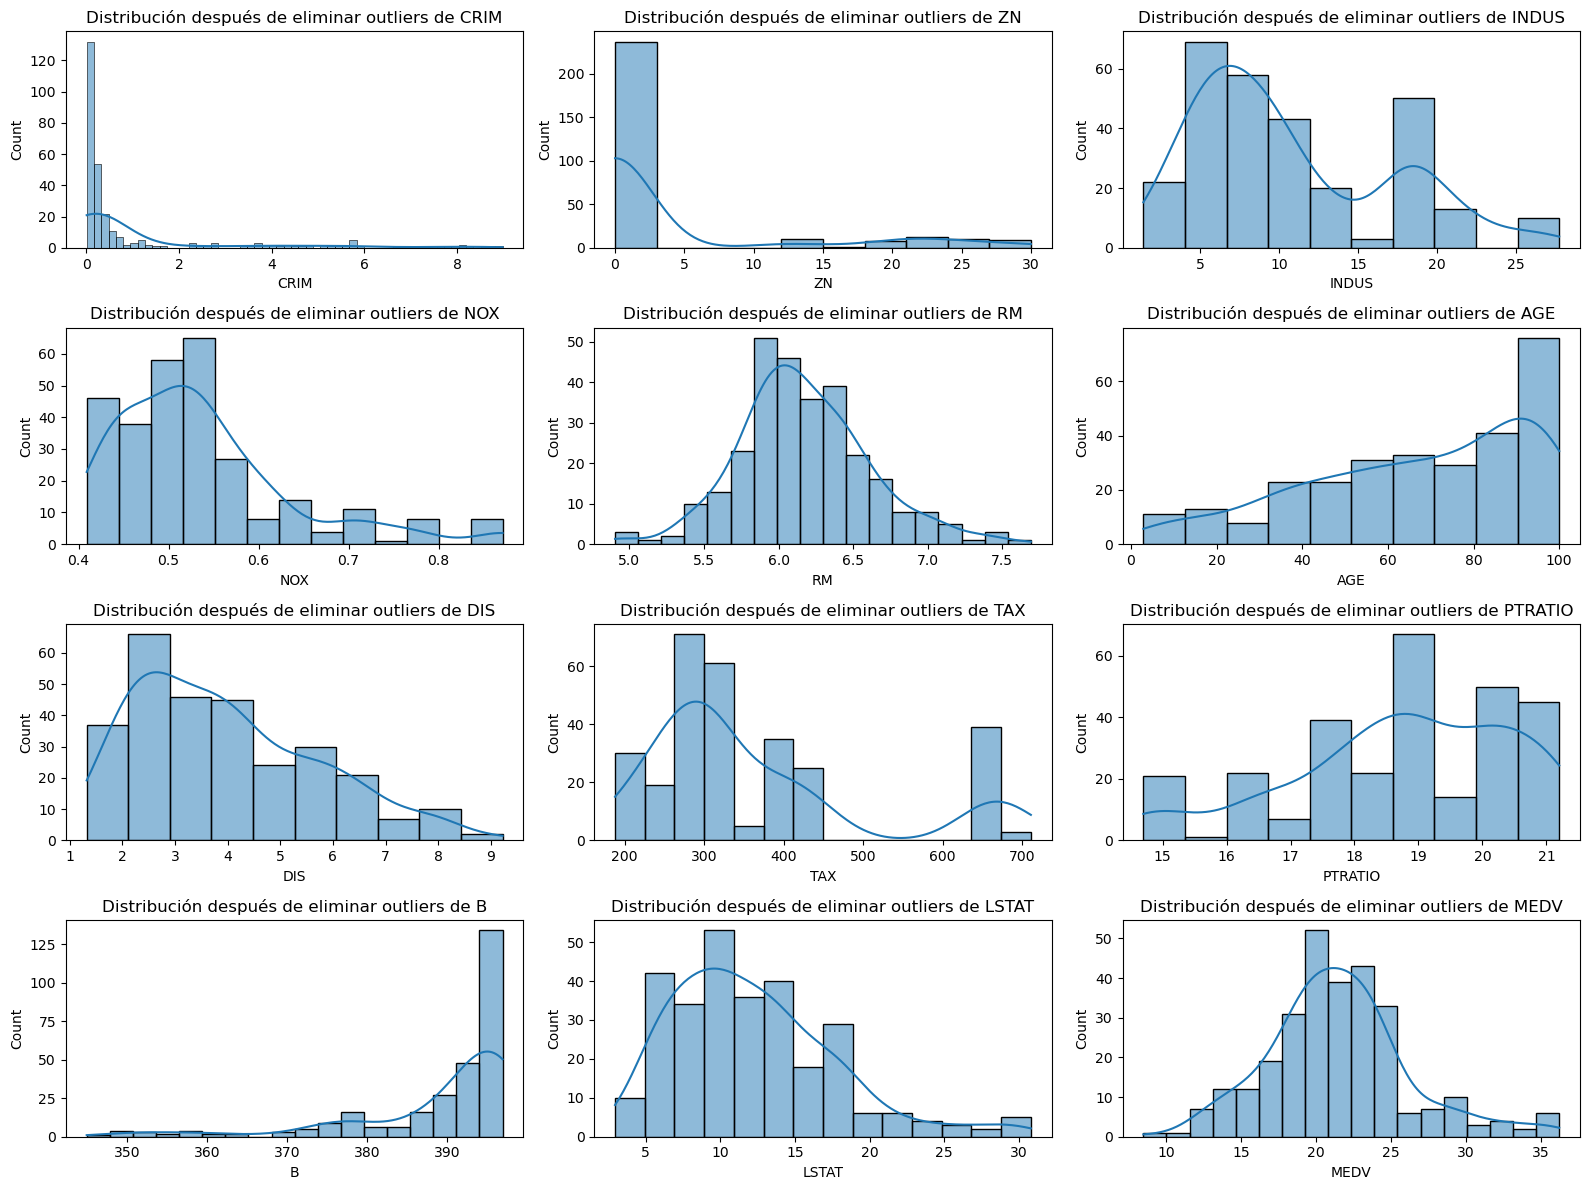

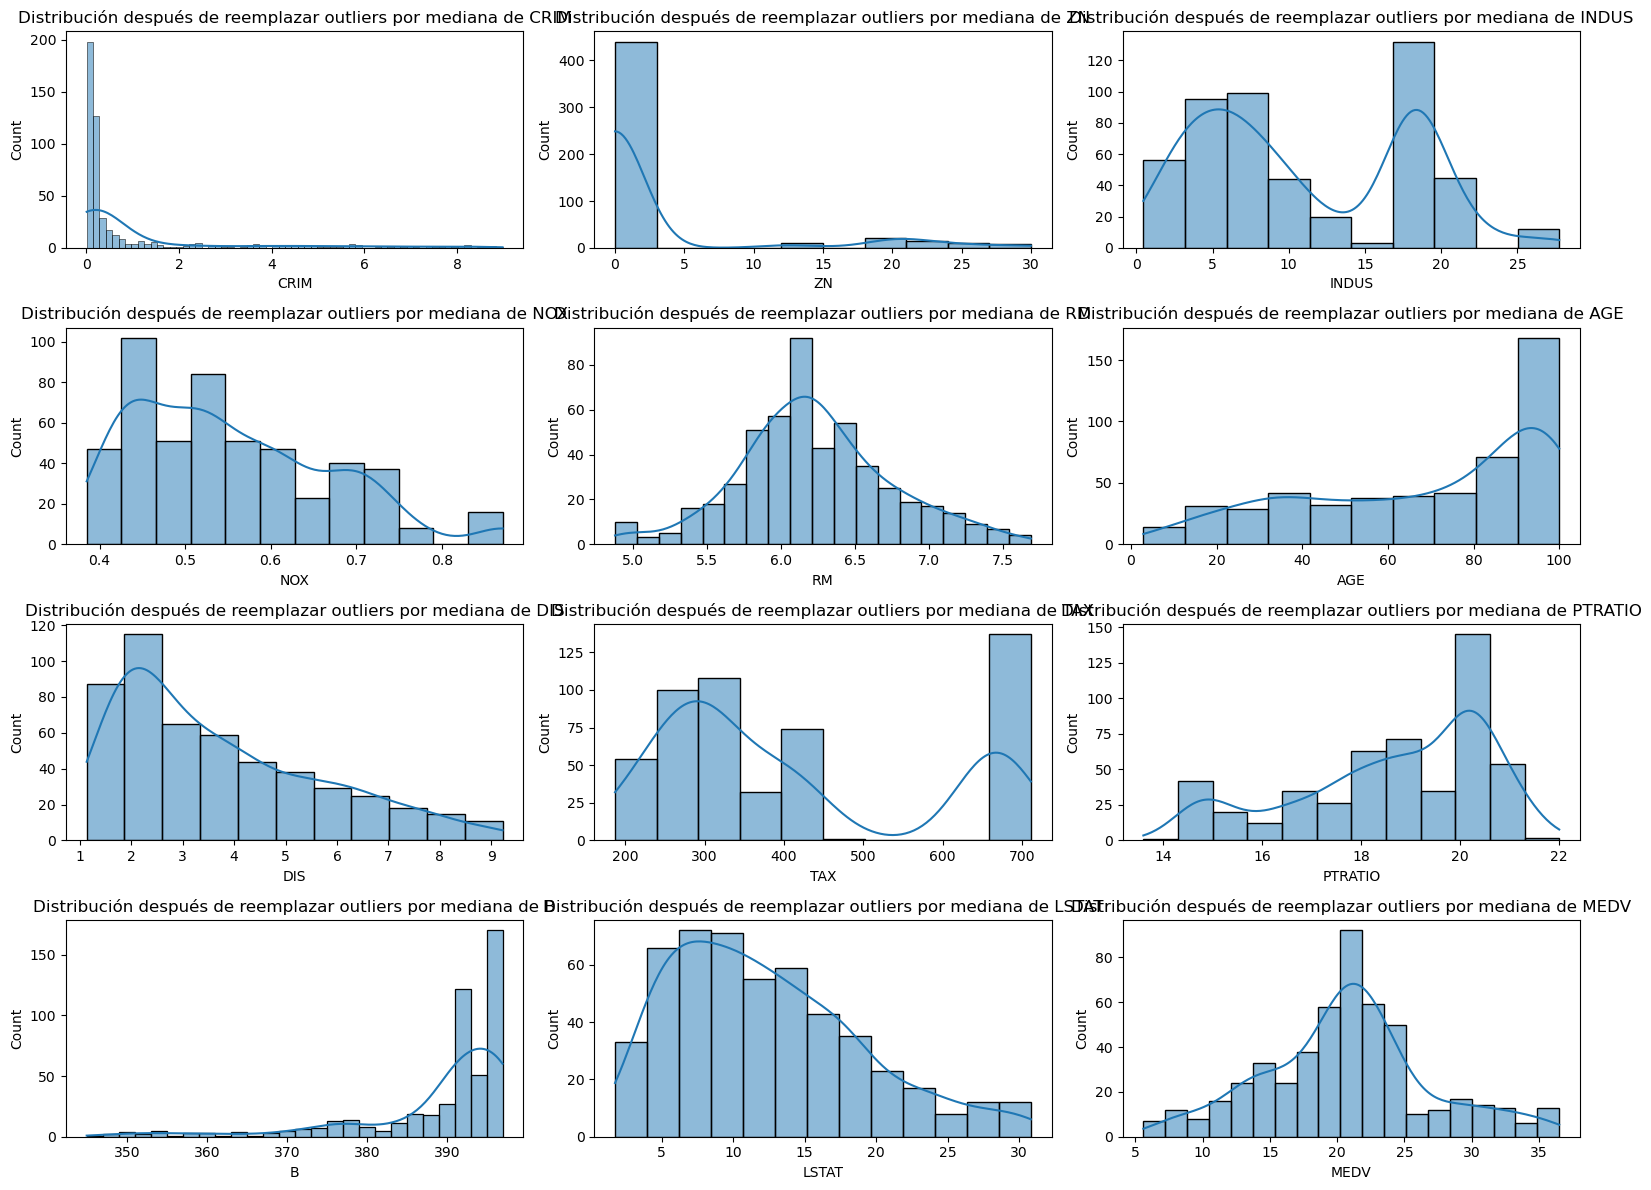

In [25]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con el dataset de Boston Housing

# Paso 1: Identificar outliers utilizando el Rango Intercuartílico (IQR)
def detectar_outliers(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Definir límites para identificar outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificar los outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
    
    return outliers

# Detectar los outliers
outliers = detectar_outliers(df)

# Mostrar los outliers detectados
for col, indices in outliers.items():
    print(f'Outliers en la columna {col}: {len(indices)} valores')

# Paso 2: Tratar los outliers

# Opción 1: Eliminar outliers
df_sin_outliers = df.copy()
for col, indices in outliers.items():
    if indices:  # Asegurarnos de que la lista de índices no esté vacía
        # Comprobamos si los índices realmente existen en el DataFrame
        indices_validos = [idx for idx in indices if idx in df_sin_outliers.index]
        if indices_validos:  # Eliminamos solo los índices válidos
            df_sin_outliers = df_sin_outliers.drop(indices_validos)

# Opción 2: Sustituir outliers por la mediana
df_reemplazado = df.copy()
for col, indices in outliers.items():
    mediana = df[col].median()
    if indices:  # Asegurarnos de que la lista de índices no esté vacía
        # Comprobamos si los índices realmente existen en el DataFrame
        indices_validos = [idx for idx in indices if idx in df_reemplazado.index]
        if indices_validos:  # Reemplazamos solo los índices válidos
            df_reemplazado.loc[indices_validos, col] = mediana

# Paso 3: Visualización para comparar antes y después
# Histograma original
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución original de {col}')
plt.tight_layout()
plt.show()

# Histograma después de eliminar outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_sin_outliers.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_sin_outliers[col], kde=True)
    plt.title(f'Distribución después de eliminar outliers de {col}')
plt.tight_layout()
plt.show()

# Histograma después de reemplazar outliers por la mediana
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_reemplazado.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_reemplazado[col], kde=True)
    plt.title(f'Distribución después de reemplazar outliers por mediana de {col}')
plt.tight_layout()
plt.show()


**Analizar la correlación entre variables.**

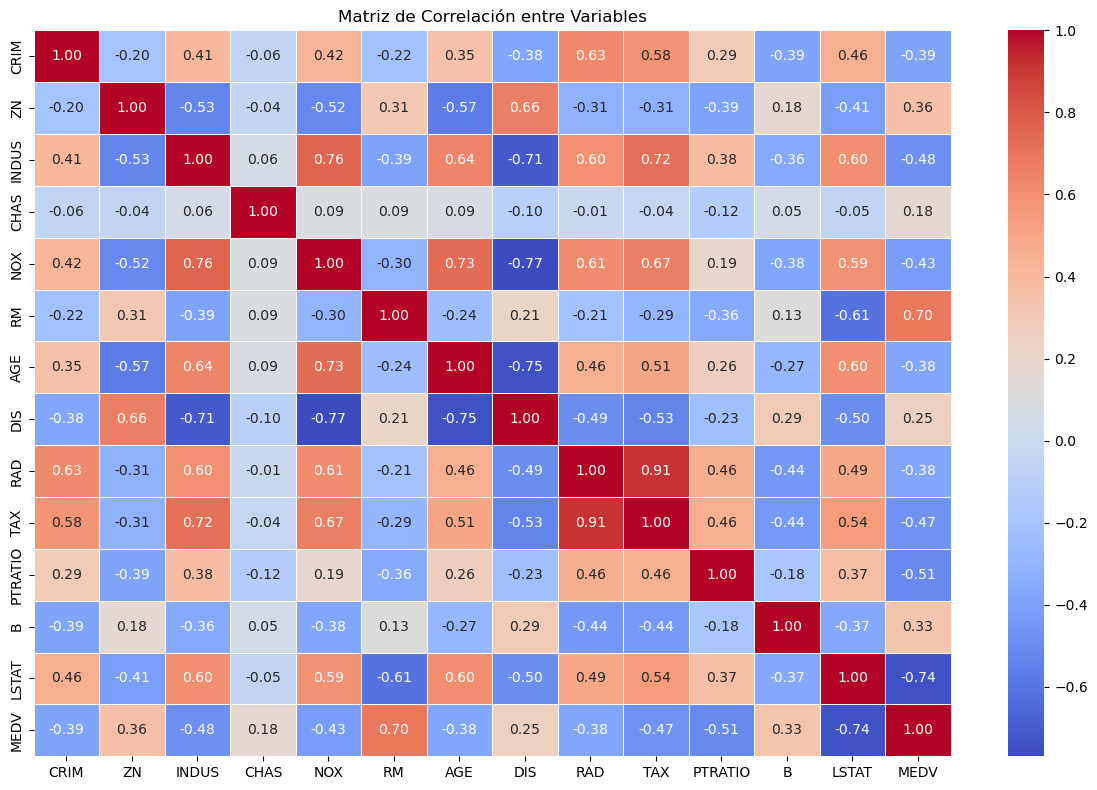

In [26]:

# Paso 1: Calcular la matriz de correlación
correlation_matrix = df.corr()

# Paso 2: Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()


**Preprocesamiento:**

Seleccionar características importantes (CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT).

In [27]:
# Paso 1: Seleccionar las características importantes
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Seleccionamos solo las columnas relevantes
df_selected = df[features]

# Paso 2: Manejo de variables categóricas
# Convertir 'CHAS' y 'RAD' a tipo numérico si es necesario (por ejemplo, one-hot encoding si fueran categorías no ordinales)
df_selected['CHAS'] = df_selected['CHAS'].astype('category')
df_selected['RAD'] = df_selected['RAD'].astype('category')

# Paso 3: Normalización de las características numéricas
from sklearn.preprocessing import StandardScaler

# Variables numéricas
numerical_cols = df_selected.select_dtypes(include=['float64']).columns

# Escalado de las variables numéricas
scaler = StandardScaler()
df_selected[numerical_cols] = scaler.fit_transform(df_selected[numerical_cols])

# Mostrar los primeros registros después del preprocesamiento
print(df_selected.head())


       CRIM        ZN     INDUS CHAS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909    0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381    0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381    0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878    0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878    0 -0.835284  1.228577 -0.511180  1.077737   

  RAD       TAX   PTRATIO         B     LSTAT  
0   1 -0.666608 -1.459000  0.441052 -1.075562  
1   2 -0.987329 -0.303094  0.441052 -0.492439  
2   2 -0.987329 -0.303094  0.396427 -1.208727  
3   3 -1.106115  0.113032  0.416163 -1.361517  
4   3 -1.106115  0.113032  0.441052 -1.026501  


C:\Users\user\AppData\Local\Temp\ipykernel_5228\362583557.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['CHAS'] = df_selected['CHAS'].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_5228\362583557.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['RAD'] = df_selected['RAD'].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_5228\362583557.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc